Read results of the R model (where agents know __some__ neighborhood availability) from __Argon__. Also compare this to the baseline model (simple_model) with __numAgents=10__

Note that the results are obtained based on models run only once

09-06-2017.

__Results seem to be fine__. Run multiple times for each __numAgents__ for simple models.

<hr>

In [20]:
import pickle
from itertools import combinations

In [21]:
import numpy as np
import scipy as sp
import pandas as pd

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<hr>

### Read pickled results

#### simple-model

In [24]:
result_list = pickle.load(open('./results/simple-model-09062017.dump', 'rb'))
print(len(result_list))
print(result_list[0].keys())

11
dict_keys(['model', 'numAgents', 'type', 'agent'])


In [34]:
for result in result_list:
    numAgents = result['numAgents']
    if numAgents == 10:
        baseline_model_df = result['model']
        baseline_agent_df = result['agent']
        baseline_model_df['model_type'] = r'$r=0$'
        baseline_agent_df['model_type'] = r'$r=0$'
        break

#### r-model

In [8]:
result_dict = pickle.load(open('./results/r-model-test.dump', 'rb'))
len(result_dict)

4

In [10]:
result_dict.keys()

dict_keys(['agent', 'numAgents', 'R', 'model'])

In [13]:
result_dict['R'], result_dict['numAgents']

(1, 10)

In [35]:
model_df = result_dict['model']
model_df['model_type'] = r'$r=1$'
agent_df = result_dict['agent']
agent_df['model_type'] = r'$r=1$'

#### Combine dataframes

In [36]:
agent_df = agent_df.append(baseline_agent_df)
model_df = model_df.append(baseline_model_df)

In [38]:
agent_df.shape

(20020, 4)

In [39]:
model_df.shape

(2000, 3)

<hr>

### Model level

#### The number of agents born at each timestamp.

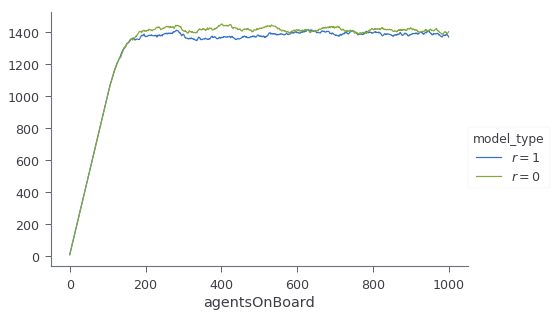

In [60]:
ax = plt.figure(figsize=(6,5))
agentsOnBoard_p = sns.FacetGrid(model_df, hue='model_type', aspect=1.5, size=4.5)
agentsOnBoard_p = agentsOnBoard_p.map(plt.plot, 'agentsOnBoard')
agentsOnBoard_p.add_legend()

#### Density

In [61]:
model_df['density'] = model_df['agentsOnBoard']/(100*100)
baseline_model_df['density'] = baseline_model_df['agentsOnBoard']/(100*100)

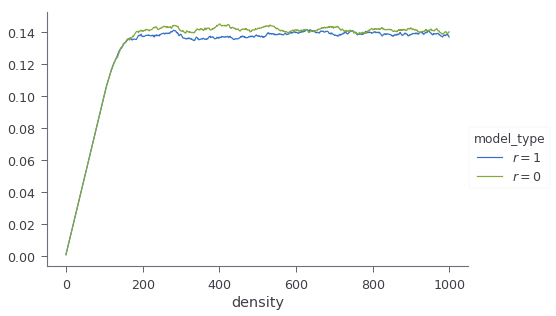

In [65]:
agentsOnBoard_p = sns.FacetGrid(model_df, hue='model_type', aspect=1.5, size=4.5)
agentsOnBoard_p = agentsOnBoard_p.map(plt.plot, 'density')
agentsOnBoard_p.add_legend()

<hr>

### Agent level

In [63]:
agent_df.columns

Index(['birthday', 'exitday', 'duration', 'model_type'], dtype='object')

In [64]:
agent_df.dtypes

birthday        int64
exitday       float64
duration      float64
model_type     object
dtype: object

#### Duration

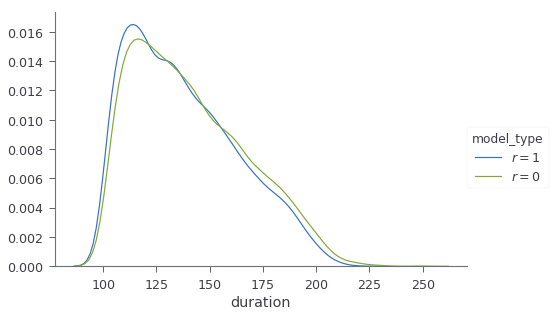

In [67]:
duration_p = sns.FacetGrid(agent_df, hue='model_type', aspect=1.5, size=4.5)
duration_p = duration_p.map(sns.kdeplot, 'duration')
duration_p.add_legend()